# Demographic data

In [1]:
import pyreadstat

# read the .sav file
df, meta = pyreadstat.read_sav("BrainsInSync_Qualtrics_June8-2022_FINAL.sav")
df.head()

,ID,RecordedDate,Date_EEG,Age_child_EEG_Days,Age_child_EEG_Months,Birthdate_child,Sex_Infant,GA_atbirth_1,GA_atbirth_2,Type_Birth,...,PBQ_Sum,PBQ_General_Mean,PBQ_General_Sum,PBQ_AngerRejection_Mean,PBQ_AngerRejection_Sum,PBQ_ConfidenceAnx_Mean,PBQ_ConfidenceAnx_Sum,PBQ_AgressionBaby_Mean,PBQ_AgressionBaby_Sum,Opmerkingen_overig
0,T802,2021-04-14 10:10:45,2021-04-23,417.0,13.0,2020-03-02,1.0,38,2,1.0,...,4.0,0.166667,2.0,0.142857,1.0,0.25,1.0,0.0,0.0,
1,T563,2021-04-28 19:19:05,2021-04-29,327.0,10.0,2020-06-06,1.0,39,4,1.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,
2,T029,2021-04-28 22:56:12,2021-05-19,370.0,12.0,2020-05-14,1.0,39,6,1.0,...,31.0,1.500000,18.0,1.285714,9.0,1.00,4.0,0.0,0.0,
3,T035,2021-05-10 20:11:42,2021-05-12,357.0,11.0,2020-05-20,1.0,38,4,1.0,...,6.0,0.250000,3.0,0.000000,0.0,0.75,3.0,0.0,0.0,
4,T775,2021-05-12 18:47:39,2021-05-21,233.0,7.0,2020-09-30,2.0,39,6,1.0,...,4.0,0.250000,3.0,0.000000,0.0,0.25,1.0,0.0,0.0,


### Exclude the participants who were not present in the neural synchrony dataset

In [2]:
# IDs of participants in the neural synchrony dataset
ids = ['T029', 'T035', 'T036', 'T049', 'T050', 'T056', 'T122', 'T137', 'T188', 'T212', 'T262', 'T287', 'T290', 'T351', 'T389', 'T435', 'T475', 'T477', 'T484', 'T487', 'T520', 'T551', 'T563', 'T576', 'T596', 'T600', 'T623', 'T637', 'T655', 'T682', 'T684', 'T775', 'T802', 'T815', 'T882', 'T892', 'T899', 'T916', 'T917', 'T997']

# IDs of participants from the qualtrics survey
df_ids = list(df['ID'])
excluded_participants = ['T475', 'T563', 'T623', 'T802', 'T899', 'T916', 'T917']

# list of participant IDs to exclude because of missing data
exclude_ids = [i for i in df_ids if i not in ids or i in excluded_participants]
print(exclude_ids)

# exclude rows with the specified IDs
df = df[~df['ID'].isin(exclude_ids)]

['T802', 'T563', 'T899', 'T876', 'T623', 'T917', 'T118', 'T475', 'T916', 'T060', 'T957']


### Age of infants

In [4]:
# Age of the infant
print('Average age of the infant (in months)', '\n', df['Age_child_EEG_Months'].mean(), '\n')
print('Standard deviation of the age of the infant (in months)', '\n', df['Age_child_EEG_Months'].std(), '\n')
print('Mode age of the infant (in months)', '\n', df['Age_child_EEG_Months'].mode(), '\n')
print('Median age of the infants (in months)', '\n', df['Age_child_EEG_Months'].median(), '\n')
print('Minimum and maximum ages of the infants (in months)', '\n', df['Age_child_EEG_Months'].min(), df['Age_child_EEG_Months'].max(), '\n')

Average age of the infant (in months) 
 8.878787878787879 

Standard deviation of the age of the infant (in months) 
 1.3864878235485825 

Mode age of the infant (in months) 
 0    9.0
Name: Age_child_EEG_Months, dtype: float64 

Median age of the infants (in months) 
 9.0 

Minimum and maximum ages of the infants (in months) 
 5.0 12.0 



### Age of moms

In [5]:
# Age of the mom
print('Average age of the mom', '\n', df['Mom_age'].mean(), '\n')
print('Standard deviation of the age of the mom', '\n', df['Mom_age'].std(), '\n')
print('Mode age of the mom', '\n', df['Mom_age'].mode(), '\n')
print('Median age of the mom', '\n', df['Mom_age'].median(), '\n')
print('Minimum and maximum ages of the mom', '\n', df['Mom_age'].min(), df['Mom_age'].max(), '\n')

Average age of the mom 
 31.545454545454547 

Standard deviation of the age of the mom 
 6.514843192140684 

Mode age of the mom 
 0    29.0
1    30.0
2    33.0
3    34.0
Name: Mom_age, dtype: float64 

Median age of the mom 
 32.0 

Minimum and maximum ages of the mom 
 0.0 42.0 



### Sex of infants

In [6]:
print(df['Sex_Infant'].value_counts())

2.0    20
1.0    13
Name: Sex_Infant, dtype: int64


### Nationality of moms

In [14]:
print(df[['ID', 'nationaliteit']])

      ID nationaliteit
2   T029   Nederlandse
3   T035   Nederlandse
4   T775   Nederlandse
5   T655   Nederlandse
7   T049   Nederlandse
9   T997   Nederlandse
10  T815   Nederlandse
11  T477   Nederlandse
13  T262   Nederlandse
14  T056   Nederlandse
15  T892   Nederlandse
16  T637   Nederlandse
17  T520   Nederlandse
18  T389      Hongaars
19  T600   Nederlandse
20  T212   Nederlandse
21  T188   Nederlandse
22  T122   Nederlandse
23  T576   Nederlandse
25  T684   Nederlandse
26  T551   Nederlandse
27  T682   Nederlandse
29  T882   Nederlandse
31  T036   Nederlandse
32  T487   Nederlandse
34  T435         Duits
35  T290   Nederlandse
36  T050   Nederlandse
37  T351   Nederlandse
38  T484   Nederlandse
41  T596   Nederlandse
42  T287   Nederlandse
43  T137         Pools


### Gestational age

In [8]:
print(df['GA_atbirth_1'])

2     39
3     38
4     39
5     40
7     40
9     40
10    37
11    36
13    40
14    38
15    40
16    37
17    41
18    40
19    39
20    38
21    38
22    38
23    39
25    40
26    39
27    39
29    40
31    38
32    39
34    40
35    38
36    39
37    38
38    41
41    39
42    37
43    38
Name: GA_atbirth_1, dtype: object


### Type of birth

In [9]:
print(df['Type_Birth'])

2     1.0
3     1.0
4     1.0
5     1.0
7     1.0
9     1.0
10    1.0
11    2.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    2.0
20    1.0
21    2.0
22    2.0
23    1.0
25    1.0
26    1.0
27    1.0
29    1.0
31    1.0
32    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
41    1.0
42    1.0
43    1.0
Name: Type_Birth, dtype: float64


# Analyzing segments

In [10]:
import pandas as pd
segments = pd.read_excel('neural syncrhony amount of segments.xlsx', header = 1)
segments.head()

,N,Play1,Still1,Play2,Still2,Reun,total
0,29,103,120,120,109,75,120
1,35,115,106,111,109,101,120
2,36,119,120,120,115,112,120
3,49,93,120,69,78,52,120
4,50,118,110,118,113,117,120


In [11]:
segments['Play1'] = pd.to_numeric(segments['Play1'], errors = 'coerce')
segments['Still1'] = pd.to_numeric(segments['Still1'], errors = 'coerce')
segments['Play2'] = pd.to_numeric(segments['Play2'], errors = 'coerce')
segments['Still2'] = pd.to_numeric(segments['Still2'], errors = 'coerce')
segments['Reun'] = pd.to_numeric(segments['Reun'], errors = 'coerce')

In [12]:
print('Phase:', 'Play1',	'Still1',	'Play2',	'Still2',	'Reun', '\n')
print('Mean num of segments', segments['Play1'].mean(), segments['Still1'].mean(), segments['Play2'].mean(), segments['Still2'].mean(), segments['Reun'].mean())
print('SD', segments['Play1'].std(), segments['Still1'].std(), segments['Play2'].std(), segments['Still2'].std(), segments['Reun'].std())

Phase: Play1 Still1 Play2 Still2 Reun 

Mean num of segments 102.125 101.475 97.63157894736842 101.05882352941177 98.28571428571429
SD 18.431004396855943 23.763781426622902 22.2035072133814 26.971299197334872 20.211486874563985


### Plot of the BioSemi 64 + 2 Channels montage (10-20 system)

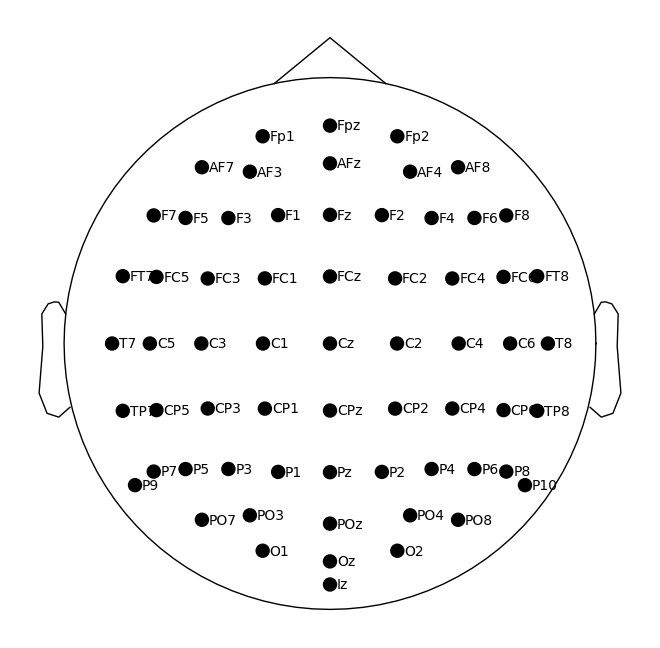

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Define the electrode locations for the Biosemi 64 10-20 montage
montage = mne.channels.make_standard_montage('biosemi64')

# Get the locations of the electrodes of interest
ch_names = ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']
ch_locs = np.array([montage.ch_names.index(ch_name) for ch_name in ch_names])

# Plot the electrode locations
montage.plot(scale_factor=70, show_names=True, show=False);
